In [ ]:
%pip install copulas
%pip install sdv
#importing needed libraries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 20.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Data.csv')
#import the data set that you have to test on

In [ ]:
data

,Sex,Age_category,Highest_education_level
0,2,2,2
1,1,2,3
2,2,1,2
3,2,2,3
4,1,2,2
...,...,...,...
195,2,1,1
196,1,2,2
197,2,1,3
198,1,1,0


In [ ]:
import numpy as np
from copulas.multivariate import GaussianMultivariate

# Assuming 'data' is your original dataset
# Replace it with your actual data


# Initialize the GaussianMultivariate copula model
model = GaussianMultivariate()

# Fit the model to your data
model.fit(data)

categorical_features=["Sex","Age_category","Highest_education_level"]
desired_frequencies = {
    'Sex':{1: 25324, 2: 24676},
    'Age_category':{1: 17955, 2: 29642, 3: 2403},
    'Highest_education_level':{0: 7490, 1: 5655, 2: 24400, 3: 12455}
}

# Generate synthetic data
synthetic = model.sample(50000)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [ ]:
synthetic.isnull().values.any() #check if there are any empty values in the synthetic data

False

In [ ]:
# Round the synthetic data to the nearest integer
synthetic_integral = np.round(synthetic)

# Convert the rounded values to integers
synthetic_integral = synthetic_integral.astype(int)

In [ ]:
synthetic

,Sex,Age_category,Highest_education_level
0,2.060118,1.896285,0.467205
1,1.872626,2.061505,2.112336
2,0.930861,3.010694,3.473745
3,1.775254,0.770087,1.417414
4,2.313553,0.885646,2.300730
...,...,...,...
49995,1.288835,1.670000,2.445638
49996,2.141707,3.158372,2.313423
49997,1.222295,2.001698,1.134569
49998,1.830108,2.046453,1.491455


                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.013137                -0.065668
Age_category            -0.013137      1.000000                 0.203927
Highest_education_level -0.065668      0.203927                 1.000000


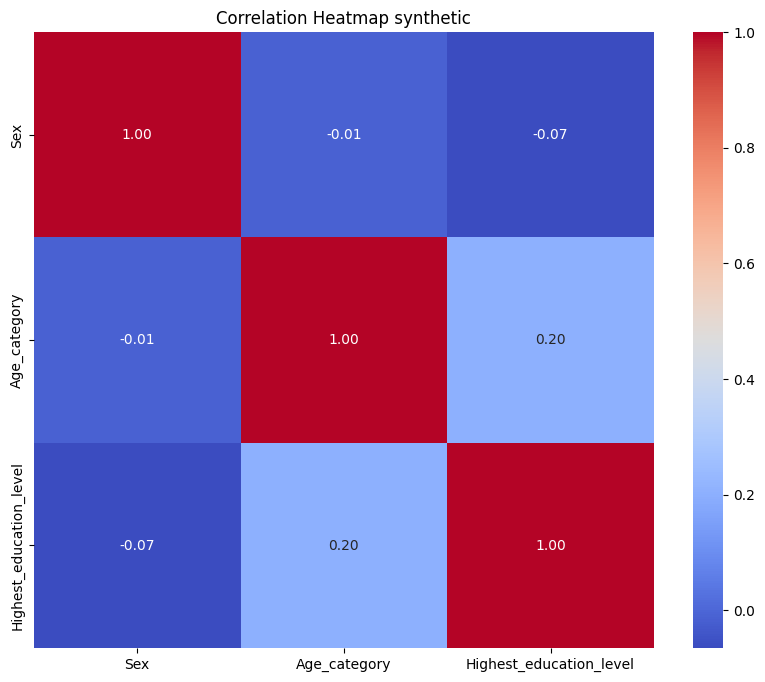

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.008211                -0.051253
Age_category            -0.008211      1.000000                 0.173927
Highest_education_level -0.051253      0.173927                 1.000000


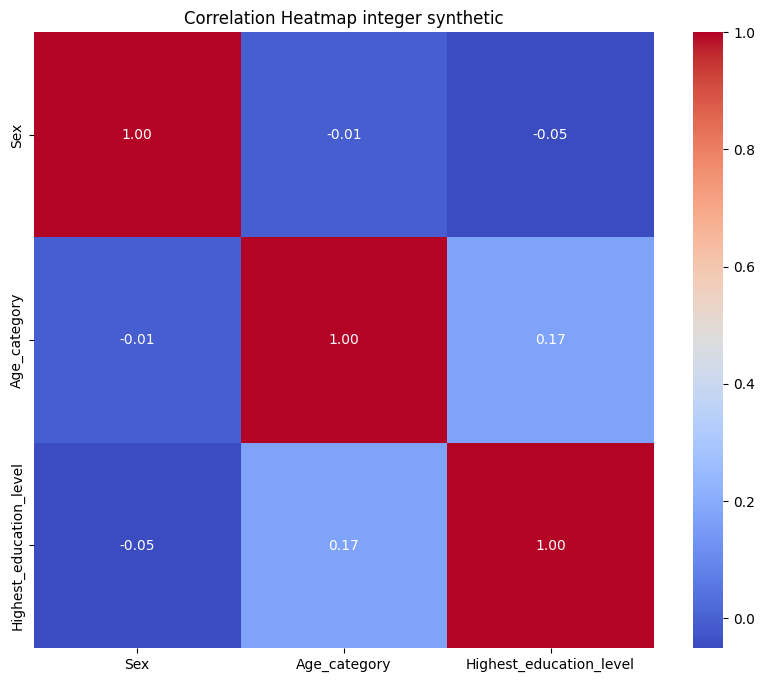

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.015917                -0.069140
Age_category            -0.015917      1.000000                 0.239223
Highest_education_level -0.069140      0.239223                 1.000000


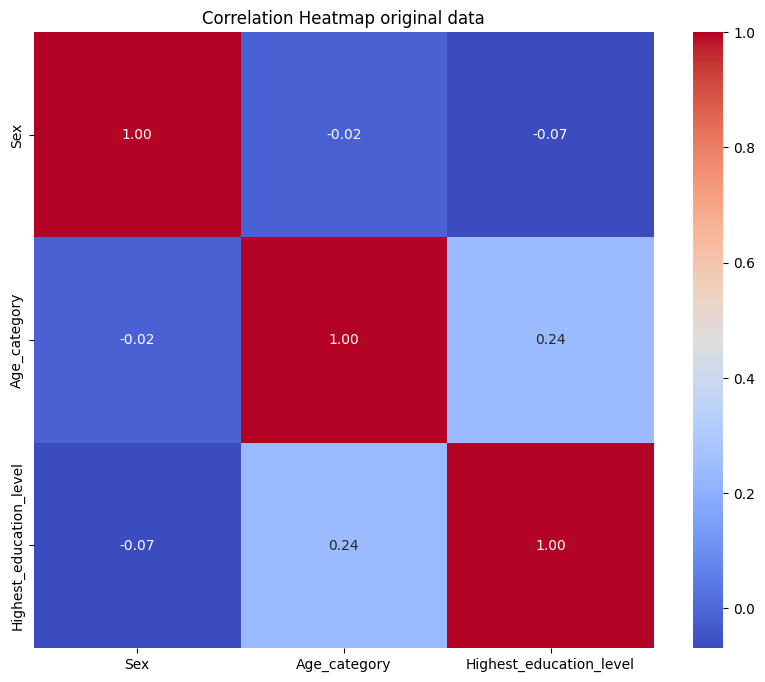

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = synthetic.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap synthetic')
plt.show()

correlation_matrix = synthetic_integral.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap integer synthetic')
plt.show()

correlation_matrix = data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap original data')
plt.show()


In [ ]:
synthetic_integral

,Sex,Age_category,Highest_education_level
0,1,2,2
1,1,2,3
2,1,2,3
3,1,2,2
4,1,2,3
...,...,...,...
49995,1,2,2
49996,1,1,2
49997,2,2,2
49998,2,1,1


In [ ]:
# Assuming you have your original dataset in a DataFrame called original_data
# original_data should have 200 samples

original_data=data
correlation_matrix = original_data.corr()

# 2. Resample data to generate new datasets
num_samples_to_generate = 50000
num_original_samples = 200

synthesized_data = []

for _ in range(num_samples_to_generate):
    # Resample with replacement
    resampled_indices = np.random.choice(num_original_samples-1, 5, replace=True)

    resampled_data = original_data.iloc[resampled_indices]

    # Ensure the correlation structure remains the same
    resampled_correlation_matrix = resampled_data.corr()
    # Adjust resampled data to match original correlation
    # You can use methods like Cholesky decomposition or other techniques to adjust covariance
    # Here, we'll use a simplified approach of scaling by the original correlation
    scaled_resampled_data = resampled_data.copy()
    for column in original_data.columns:
        scaled_resampled_data[column] = resampled_data[column] * np.sqrt(correlation_matrix.loc[column, column] / resampled_correlation_matrix.loc[column, column])

    synthesized_data.append(scaled_resampled_data)

# Concatenate synthesized datasets
synthesized_data = pd.concat(synthesized_data, ignore_index=True)

# 4. Verify correlation
synthesized_correlation_matrix = synthesized_data.corr()
print("Original Correlation Matrix:")
print(correlation_matrix)
print("\nSynthesized Correlation Matrix:")
print(synthesized_correlation_matrix)
